In [1]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os
import sys

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
%matplotlib nbagg
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
import gym

In [3]:
env = gym.make('MsPacman-v0')

In [4]:
obs = env.reset()

In [6]:
obs.shape

(210, 160, 3)

In [7]:
img = env.render(mode="rgb_array")

<IPython.core.display.Javascript object>


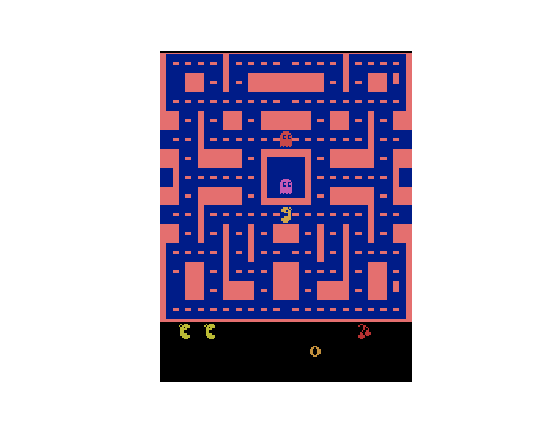

In [9]:
plt.figure(figsize=(5,4))
plt.imshow(img)
plt.axis("off")
plt.show()

In [10]:
(img == obs).all()

True

In [11]:
def plot_enviroment(env,figsize=(5,4)):
    plt.close()
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [12]:
env.action_space

Discrete(9)

In [18]:
env.reset()
for step in range(110):
    env.step(3)
for step in range(40):
    env.step(8)

<IPython.core.display.Javascript object>


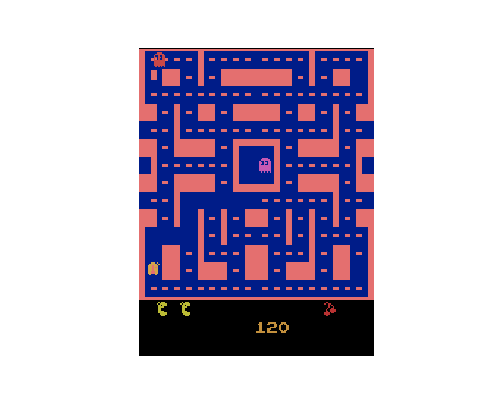

In [19]:
plot_enviroment(env)

In [20]:
obs, reward, done, info = env.step(0)

In [21]:
obs.shape

(210, 160, 3)

In [22]:
reward

50.0

In [23]:
done

False

In [24]:
info

{'ale.lives': 3}

In [25]:
frames = []
n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
    img = env.render(mode="rgb_array")
    frames.append(img)
    if step % n_change_steps == 0:
        action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    if done:
        break

In [26]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames,repeat=False,interval=40):
    plt.close()
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    return animation.FuncAnimation(fig, update_scene,fargs=(frames,patch),frames=len(frames),repeat=repeat, interval=interval)

<IPython.core.display.Javascript object>


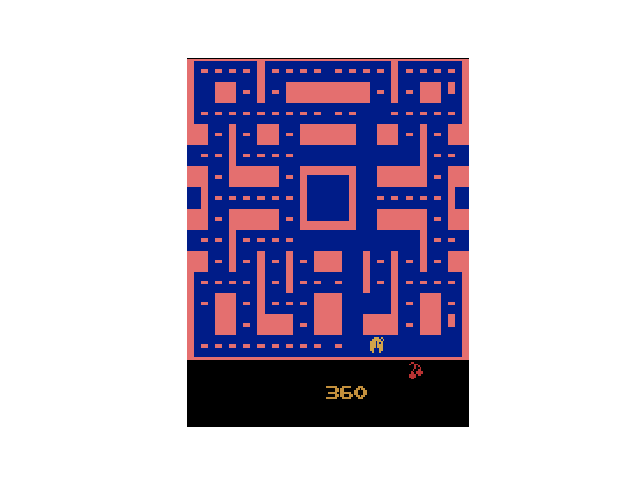

In [27]:
video = plot_animation(frames)
plt.show()

In [28]:
env.close()